In [1]:
import numpy as np

# Charger le fichier CSV
data = np.loadtxt('mesureB_n.csv', delimiter=',', dtype=float)  # skiprows=1 pour ignorer l'en-tête si présent

#récupérer la colonne du milieu
vals = np.flip(data[:,10])
offset = 0.8
dist = np.arange(0, len(vals) /2, 0.5)
dist = dist + offset

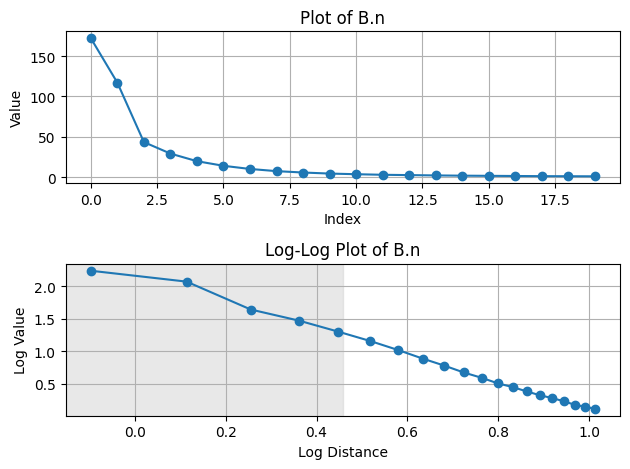

In [2]:
import matplotlib.pyplot as plt

logvals = np.log10(vals)
logdist = np.log10(dist)

plt.figure()  # Set figure size to 0.5cm by 0.5cm (converted to inches: 1cm = 0.3937 inches)
plt.subplot(2,1,1)
plt.plot(vals, marker='o')
plt.grid(True)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of B.n')
plt.subplot(2,1,2)
plt.plot(logdist, logvals, marker='o')
plt.grid(True)
plt.xlabel('Log Distance')
plt.ylabel('Log Value')
plt.title('Log-Log Plot of B.n')
#add a colored rectangle with definedcorners in the bg
plt.gca().add_patch(plt.Rectangle((0, 0), 0.5, 1, color='lightgrey', alpha=0.5, transform=plt.gca().transAxes))
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Slope: -2.1201489421149478
Intercept: 2.2270095723653256
R-squared: 0.9967597748904959


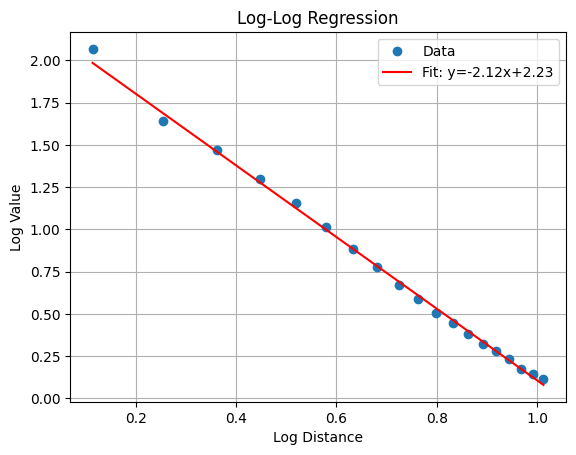

In [3]:
from scipy.stats import linregress

# Perform linear regression on the log-log data
N = 5 #number of points to skip
slope, intercept, r_value, p_value, std_err = linregress(logdist[N:], logvals[N:])  # Exclude -inf value at index 0

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

# Plot the regression line along with the data
plt.figure()
plt.plot(logdist[1:], logvals[1:], 'o', label='Data')  # Exclude -inf value at index 0
plt.plot(logdist[1:], slope * logdist[1:] + intercept, 'r', label=f'Fit: y={slope:.2f}x+{intercept:.2f}')
plt.xlabel('Log Distance')
plt.ylabel('Log Value')
plt.title('Log-Log Regression')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import math

#formule du fabriquant
# Define the formula for B
def calculate_B(z, D, L, W, Br):
    term1 = math.atan( (L * W)/((2 * z) * math.sqrt(4 * z**2 + L**2 + W**2)))
    term2 = math.atan( (L * W)/(2 * (D + z)*math.sqrt(4*(D+z)**2+L**2+W**2)))
    return Br/math.pi * (term1 - term2)

# Example usage
z = 1.0  # distance z (m)
D = 1.0e-2  # D depth (m)
L = 3.0e-2  # L length (m)
W = 1.0e-2  # W width (m)
Br = 1.42  # Br (T) : neodymium magnet

B = calculate_B(z, D, L, W, Br)
print(f"B: {B}")

B: 6.677986783726479e-07


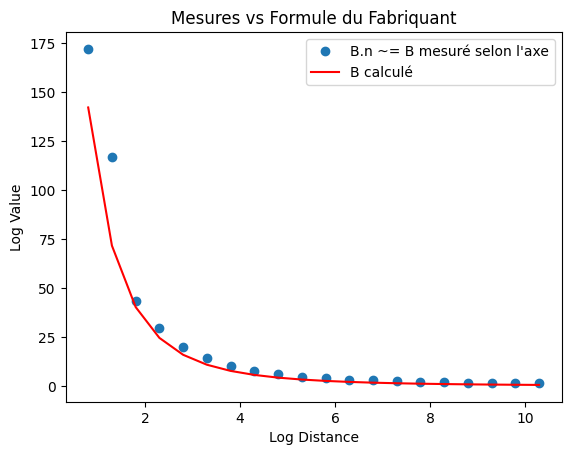

In [5]:
#plot the measured values vs calculated
plt.figure()
plt.plot(dist, vals, 'o', label="B.n ~= B mesuré selon l'axe")  # Exclude -inf value at index 0
calculated_vals = [calculate_B(z, D, L, W, Br)*1e3 for z in dist*1e-2] # And convert dist to meters
plt.plot(dist, calculated_vals, 'r', label='B calculé')
plt.xlabel('Log Distance')
plt.ylabel('Log Value')
plt.title('Mesures vs Formule du Fabriquant')
plt.legend()
plt.show()